In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


# Import Libraries 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

# Dataset Loading 

In [40]:
df =pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

# Data Checking 

In [41]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
df.shape

(150, 5)

# Preprocessing

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [44]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Visualization

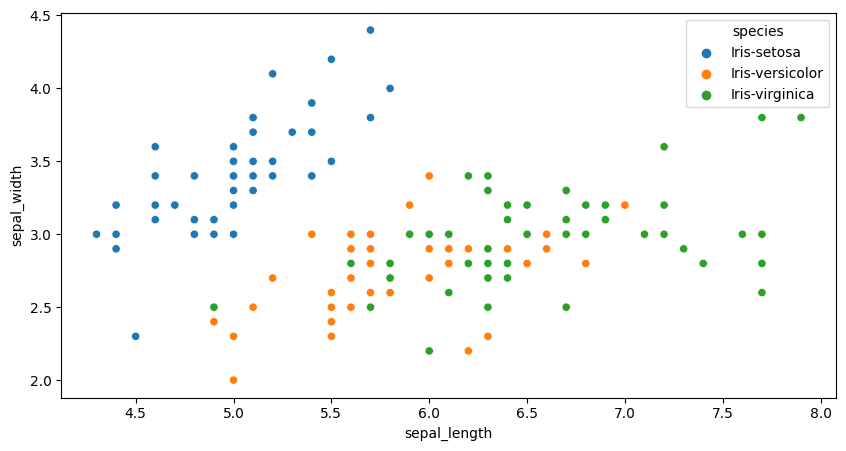

In [45]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width",hue="species")
plt.show()

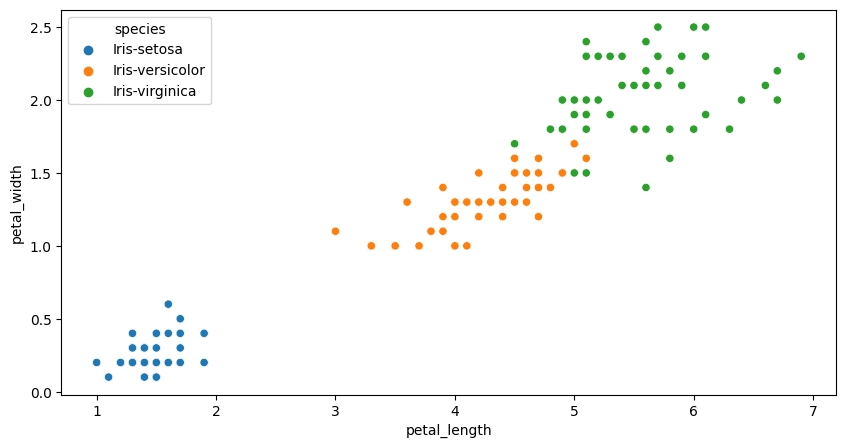

In [46]:
sns.scatterplot(data=df, x="petal_length", y="petal_width",hue="species")
plt.show()

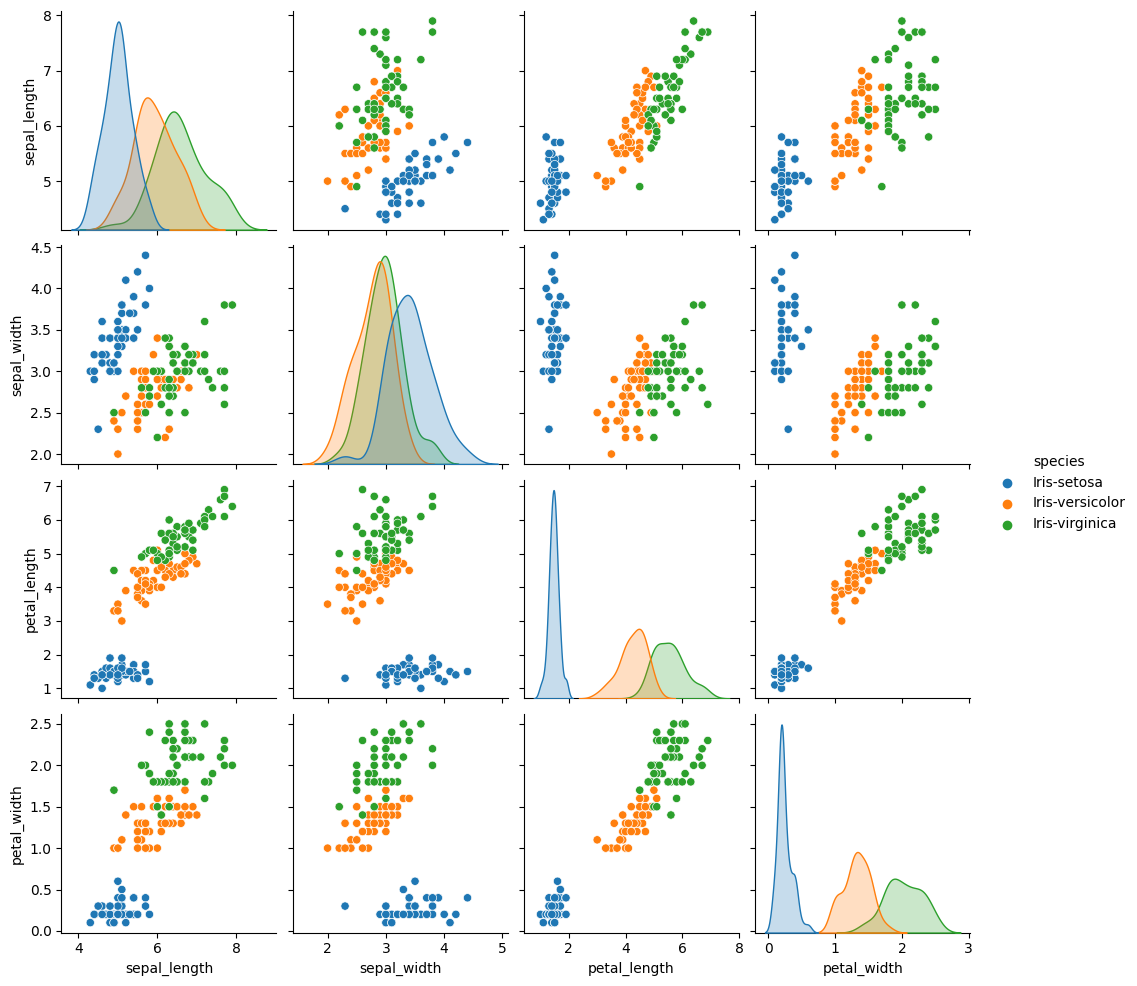

In [47]:
sns.pairplot(df,hue="species")

# Using One Hot Coding to convert species into number 

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
dfle = df
dfle.species = le.fit_transform(dfle.species)
dfle

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# custom data prediction
## Iris-setosa:0
## Iris-versicolor:1
## Iris-virginica:2

# split the Data X and Y

In [50]:
X=df.drop(columns="species",axis=1)
y=df["species"]

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Logistic Regression 

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

logistic_model = LogisticRegression()
svm_model = SVC(probability=True)
random_forest_model = RandomForestClassifier()
from sklearn.metrics import accuracy_score

In [53]:
logistic_model.fit(X_train,y_train)
pred1=logistic_model.predict(X_test)

print(f"Accuracy Score : {accuracy_score(y_test,pred1)}")

Accuracy Score : 1.0


In [54]:
test=np.array([[5.1,3.5,1.4,0.3]])
pred1=logistic_model.predict(test)
pred1

array([0])

# Random Forest Model 

In [55]:
random_forest_model.fit(X_train,y_train)
pred3=random_forest_model.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test,pred3)}")

Accuracy Score : 1.0


In [56]:
test=np.array([[5.1,3.5,1.4,0.3]])
pred3=random_forest_model.predict(test)
pred2

array([0])

In [57]:
test=np.array([[6.2,3.4,5.4,2.3]])
pred_2=random_forest_model.predict(test)
pred_2

array([2])

# Conclusion 

In this analysis of the Iris dataset, both the Logistic Regression and Random Forest models achieved outstanding accuracy with a score of 1.0, indicating perfect accuracy on the test dataset. This exceptional performance suggests that these models were able to accurately predict the class labels of the Iris flowers based on the given features. Further investigation into model generalization and potential overfitting may be warranted given the high accuracy observed.

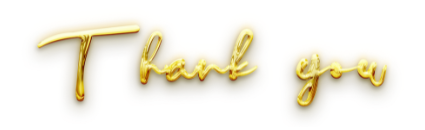